# Capstone Project - College Recommender System

# Modeling and Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('data/data_cleaned.csv')

In [3]:
data

,INSTNM,CITY,STABBR,INSTURL,PREDDEG,HIGHDEG,ADM_RATE,SAT_AVG,CURROPER,ADDR,...,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54
0,Alabama A & M University,Normal,AL,www.aamu.edu/,3,4,0.684,920.0,1,4900 Meridian Street,...,0.0431,0.0313,0.0,0.0,0.0,0.0,0.0137,0.0000,0.1526,0.0000
1,University of Alabama at Birmingham,Birmingham,AL,https://www.uab.edu/,3,4,0.8668,1291.0,1,Administration Bldg Suite 1070,...,0.0175,0.0265,0.0,0.0,0.0,0.0,0.0248,0.2213,0.1934,0.0080
2,Amridge University,Montgomery,AL,https://www.amridgeuniversity.edu/,3,4,Not Available,Not Available,1,1200 Taylor Rd,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.4565,0.0000
3,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu/,3,4,0.781,1259.0,1,301 Sparkman Dr,...,0.0000,0.0249,0.0,0.0,0.0,0.0,0.0535,0.1119,0.1945,0.0079
4,Alabama State University,Montgomery,AL,www.alasu.edu/,3,4,0.966,963.0,1,915 S Jackson Street,...,0.0438,0.0271,0.0,0.0,0.0,0.0,0.0604,0.0500,0.1500,0.0104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706,Galen Health Institutes-Houston,Houston,TX,https://galencollege.edu/,2,0,Not Available,Not Available,1,11210 Equity Drive,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
5707,Galen Health Institutes-Pikeville,Pikeville,KY,https://galencollege.edu/campuses/pikeville,2,0,Not Available,Not Available,1,172 S. Mayo Trail,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
5708,Stellar Career College,Chicago,IL,https://stellarcollege.edu/,1,1,Not Available,Not Available,1,"205 W. Randolph Street, Suite 200",...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.0000,0.0000
5709,Commonwealth University of Pennsylvania,Bloomsburg,PA,https://www.commonwealthu.edu/,3,4,0.9396,1067.0,1,400 East Second Street,...,0.0380,0.0298,0.0,0.0,0.0,0.0,0.0244,0.2150,0.1782,0.0099


In [4]:
# select and display "PCIP" columns
pcip_columns = [col for col in data.columns if col.startswith('PCIP')]
pcip_columns

['PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54']

In [5]:
# normalize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[pcip_columns])
scaled_features

array([[ 0.36078609,  0.67882561,  0.16961188, ..., -0.73942133,
         0.50753894, -0.38198986],
       [-0.16627413, -0.20245692, -0.0609929 , ..., -0.07590657,
         0.81529616,  0.49323595],
       [-0.16627413, -0.20245692, -0.0609929 , ..., -0.73942133,
         2.79987769, -0.38198986],
       ...,
       [-0.16627413, -0.20245692, -0.0609929 , ...,  2.25883789,
        -0.64353344, -0.38198986],
       [-0.16627413,  0.07820631, -0.0609929 , ..., -0.0947956 ,
         0.70064151,  0.70110209],
       [-0.09821531,  0.2858971 , -0.0609929 , ..., -0.07950448,
         0.21637646,  0.20878756]])

## K-MEANS Clustering

In [6]:
# apply K-Means clustering
kmeans = KMeans(n_clusters=50, random_state=10)
kmeans.fit(scaled_features)

KMeans(n_clusters=50, random_state=10)

In [7]:
cluster_centers = kmeans.cluster_centers_

In [8]:
cluster_labels = kmeans.labels_

In [9]:
# add cluster labels to df
data['Cluster'] = cluster_labels
data

,INSTNM,CITY,STABBR,INSTURL,PREDDEG,HIGHDEG,ADM_RATE,SAT_AVG,CURROPER,ADDR,...,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,Cluster
0,Alabama A & M University,Normal,AL,www.aamu.edu/,3,4,0.684,920.0,1,4900 Meridian Street,...,0.0313,0.0,0.0,0.0,0.0,0.0137,0.0000,0.1526,0.0000,48
1,University of Alabama at Birmingham,Birmingham,AL,https://www.uab.edu/,3,4,0.8668,1291.0,1,Administration Bldg Suite 1070,...,0.0265,0.0,0.0,0.0,0.0,0.0248,0.2213,0.1934,0.0080,48
2,Amridge University,Montgomery,AL,https://www.amridgeuniversity.edu/,3,4,Not Available,Not Available,1,1200 Taylor Rd,...,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.4565,0.0000,49
3,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu/,3,4,0.781,1259.0,1,301 Sparkman Dr,...,0.0249,0.0,0.0,0.0,0.0,0.0535,0.1119,0.1945,0.0079,30
4,Alabama State University,Montgomery,AL,www.alasu.edu/,3,4,0.966,963.0,1,915 S Jackson Street,...,0.0271,0.0,0.0,0.0,0.0,0.0604,0.0500,0.1500,0.0104,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706,Galen Health Institutes-Houston,Houston,TX,https://galencollege.edu/,2,0,Not Available,Not Available,1,11210 Equity Drive,...,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,4
5707,Galen Health Institutes-Pikeville,Pikeville,KY,https://galencollege.edu/campuses/pikeville,2,0,Not Available,Not Available,1,172 S. Mayo Trail,...,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,4
5708,Stellar Career College,Chicago,IL,https://stellarcollege.edu/,1,1,Not Available,Not Available,1,"205 W. Randolph Street, Suite 200",...,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.0000,0.0000,3
5709,Commonwealth University of Pennsylvania,Bloomsburg,PA,https://www.commonwealthu.edu/,3,4,0.9396,1067.0,1,400 East Second Street,...,0.0298,0.0,0.0,0.0,0.0,0.0244,0.2150,0.1782,0.0099,48


In [10]:
# apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
pca_centers = pca.transform(cluster_centers)
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

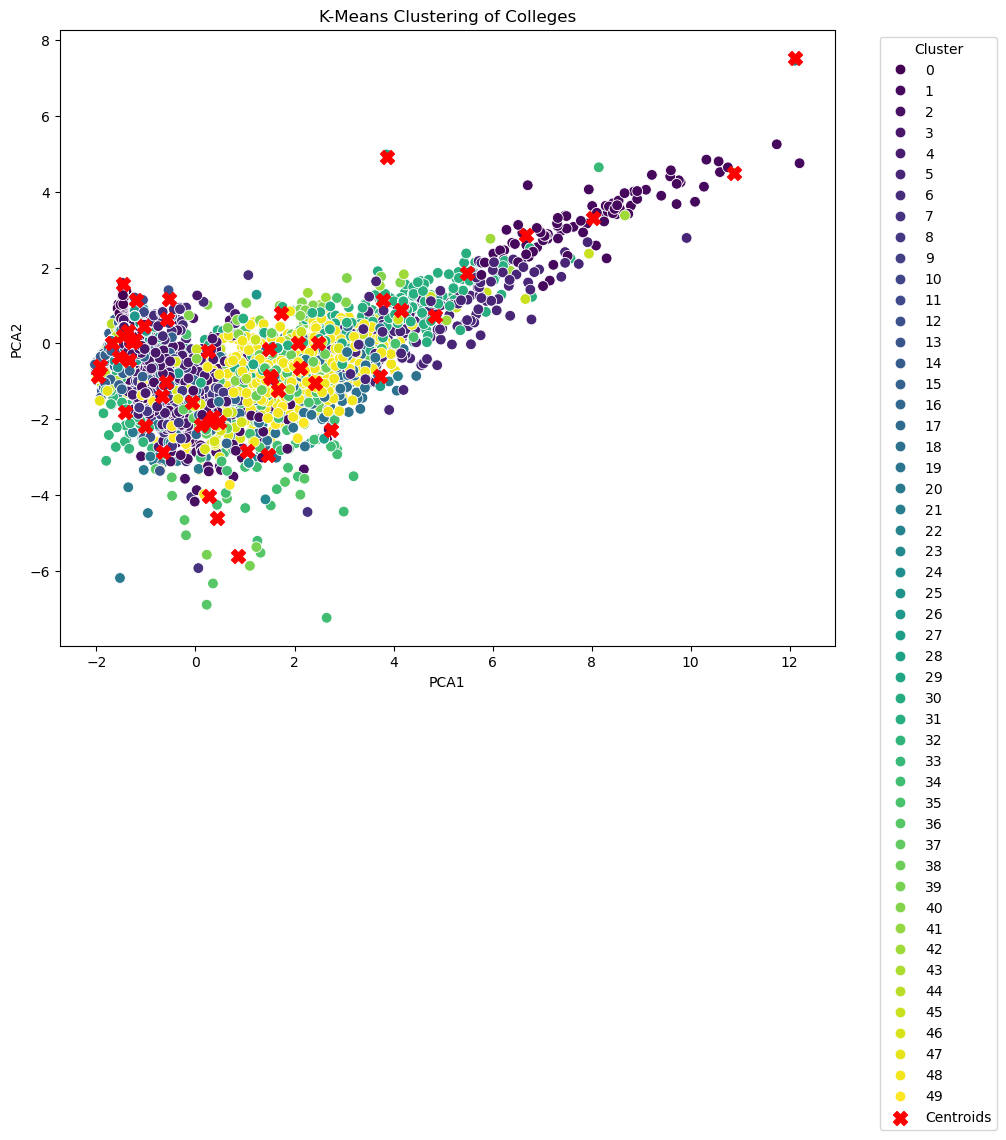

In [11]:
# plot the clusters and centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, legend='full', s=60)
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.title('K-Means Clustering of Colleges')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left');

In [12]:
# calculate silhouette score
silhouette_score(scaled_features, cluster_labels)

0.41526884799239544

In [13]:
# calculate silhouette scores for different numbers of clusters
silhouette_scores = []
K = range(2, 100)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
silhouette_scores

[0.29512823841996866,
 0.26000115693747833,
 0.1771427920899414,
 0.17848112880471667,
 0.18954037185023806,
 0.1974823279531936,
 0.19348328110761343,
 0.1773595518115548,
 0.17829371887987905,
 0.1702409180652158,
 0.20102154022913626,
 0.21047194180076104,
 0.2660759002563442,
 0.2783591997523501,
 0.2854363270990089,
 0.30058512769308987,
 0.31762629462130104,
 0.32691485073014626,
 0.32941409294004104,
 0.33190768552774413,
 0.33265394433343665,
 0.3359915050612884,
 0.3425696890792753,
 0.3514764150106299,
 0.35307670561930327,
 0.3575630171646697,
 0.36076155806439714,
 0.37438671804661083,
 0.3758214972916167,
 0.38346319504637466,
 0.39161690348298445,
 0.3927185551179229,
 0.3979564285715199,
 0.39693056108444336,
 0.3989172472090019,
 0.39992636380172275,
 0.3991414387843068,
 0.4001384534010227,
 0.40124760832072426,
 0.4071605293387963,
 0.40879688193527863,
 0.40552634630561213,
 0.41351677704770046,
 0.4135491353735963,
 0.4084552867427242,
 0.40848093772166433,
 0.41102

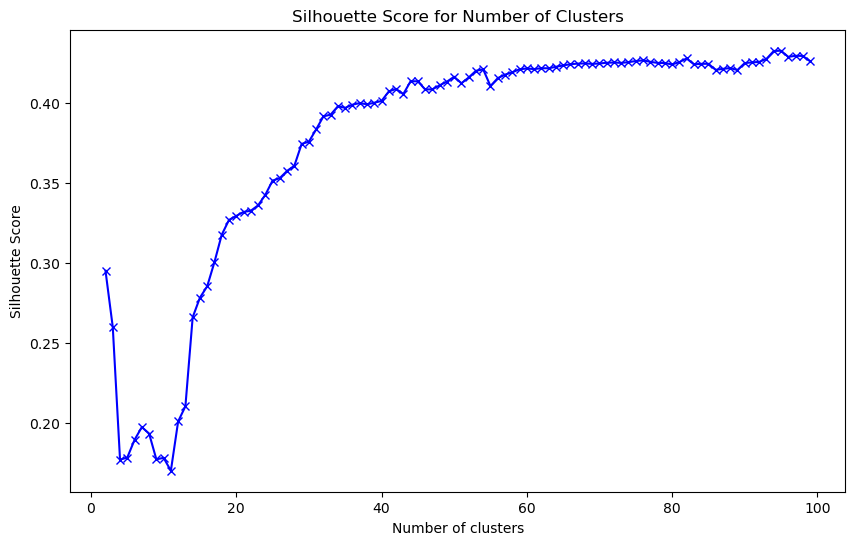

In [14]:
# plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.title('Silhouette Score for Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [15]:
# calculate average of "PCIP" in each cluster
cluster_means = data.groupby('Cluster')[pcip_columns].mean().reset_index()

In [16]:
def plot_pcip_cluster_means(cluster_means, pcip_column):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Cluster', y=pcip_column, data=cluster_means)
    plt.title(f'Average {pcip_column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {pcip_column}')
    plt.show();

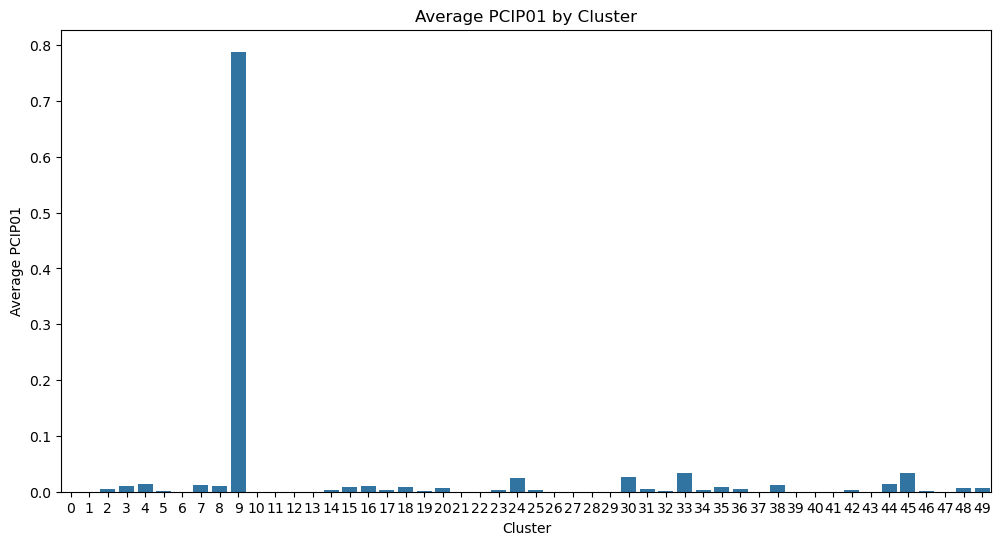

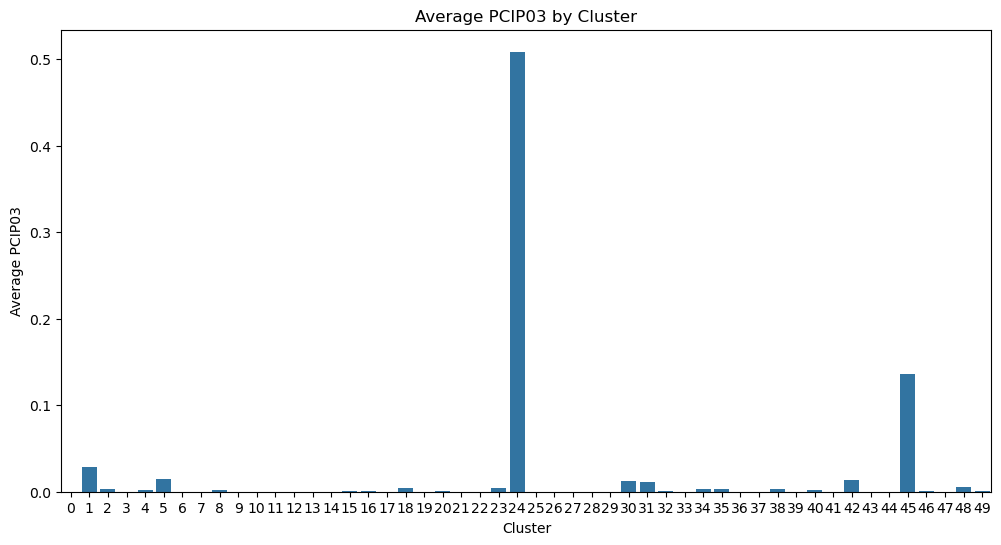

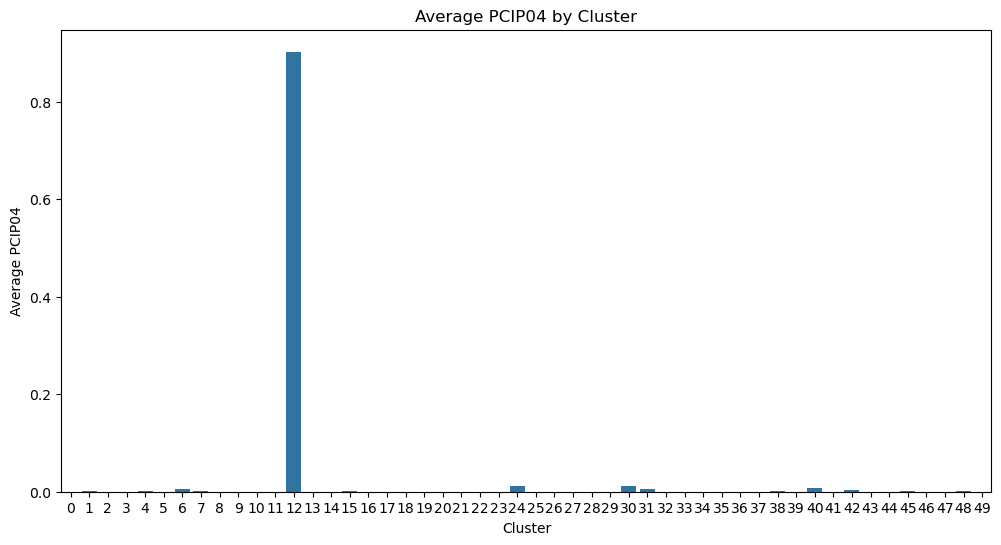

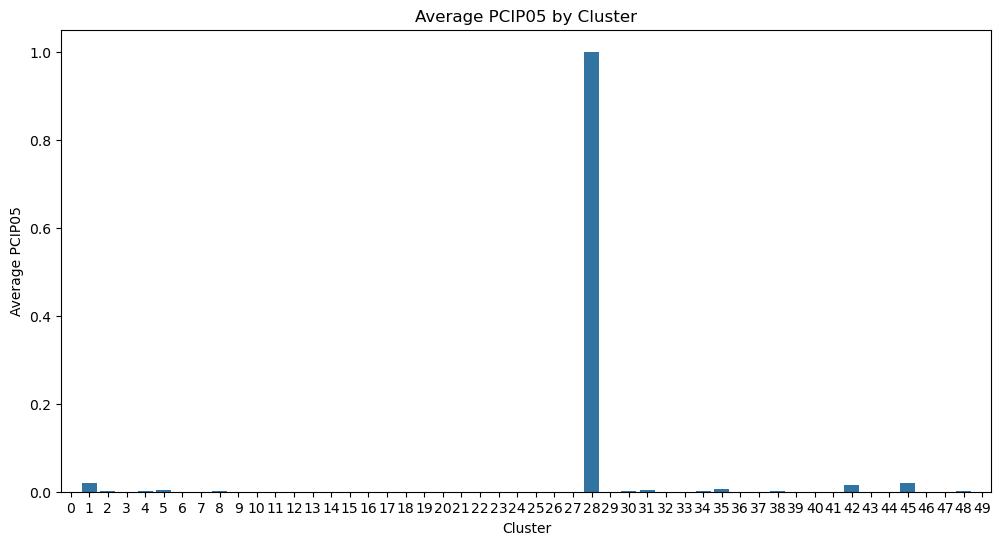

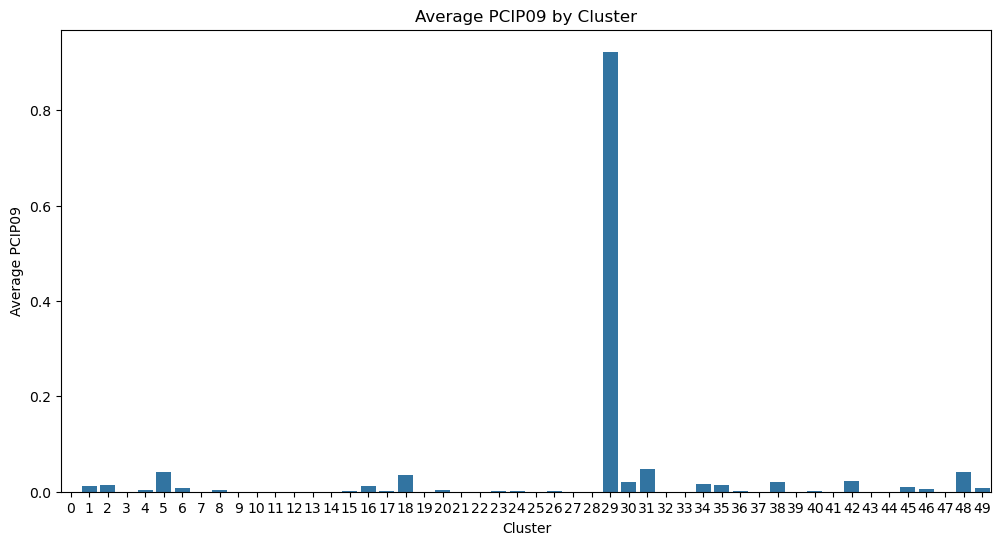

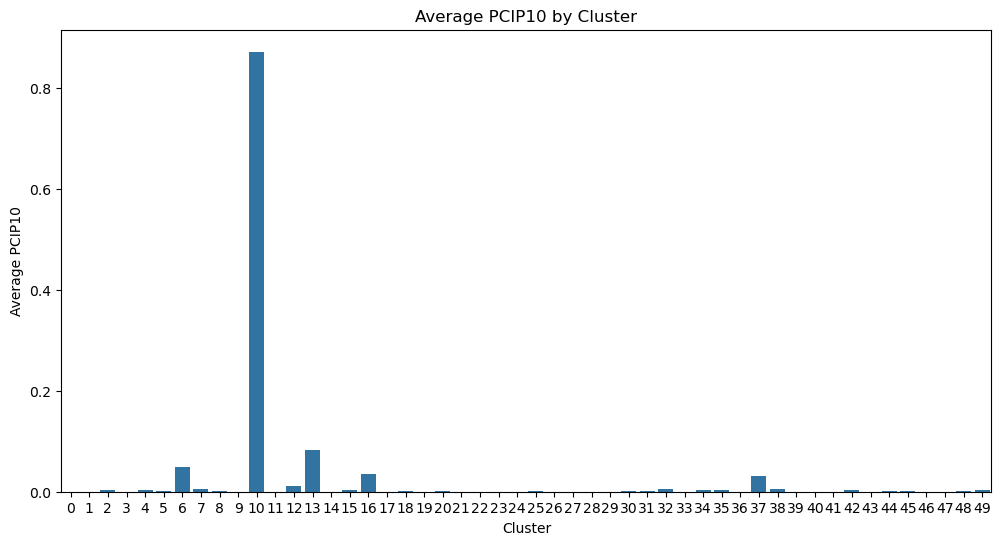

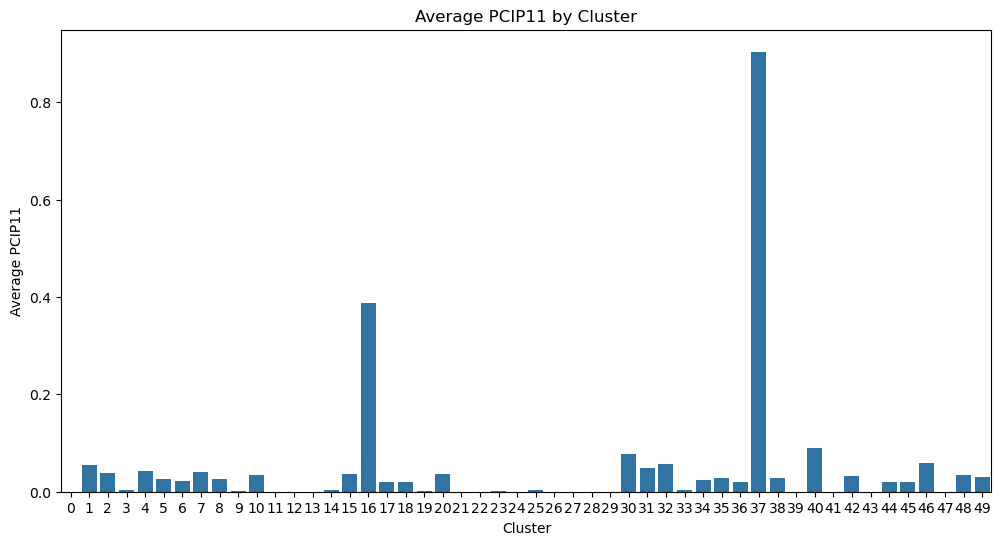

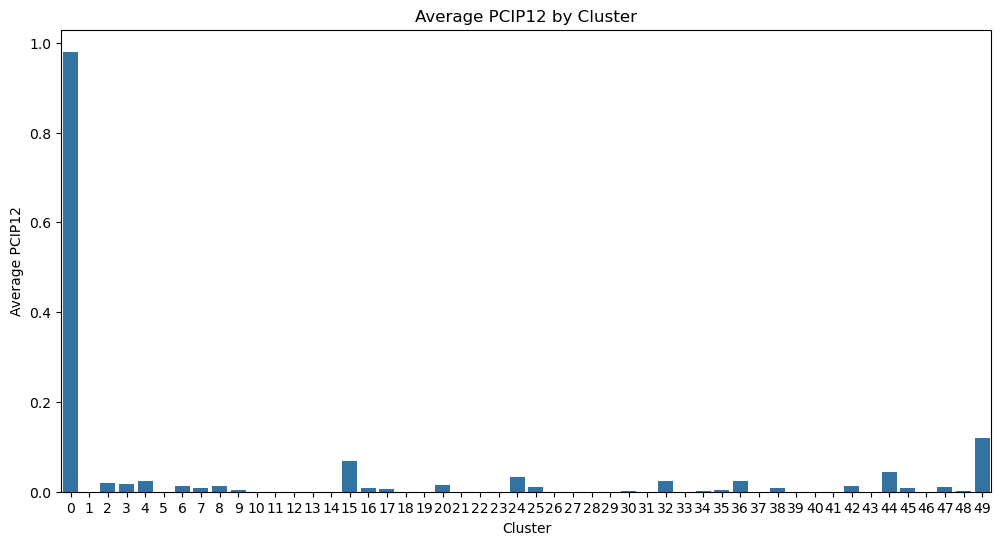

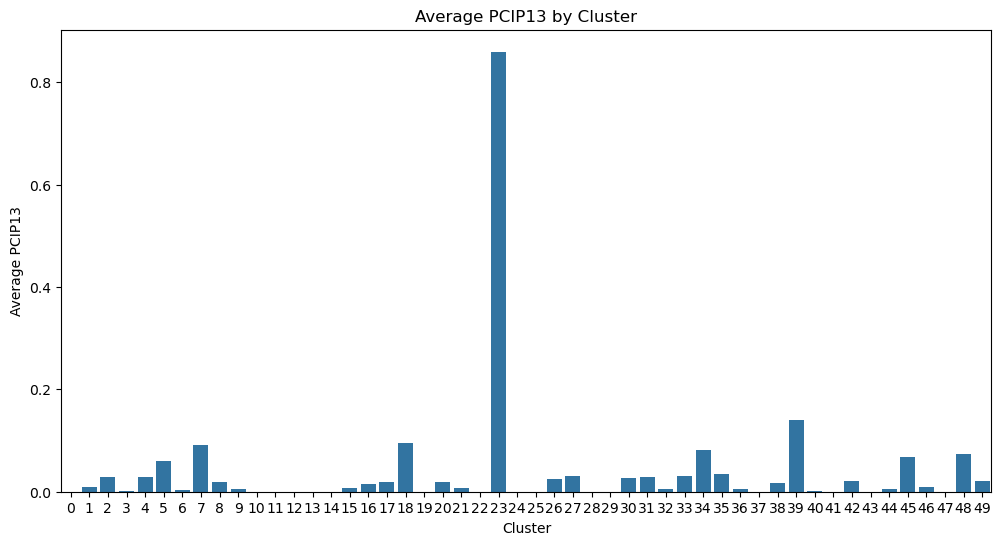

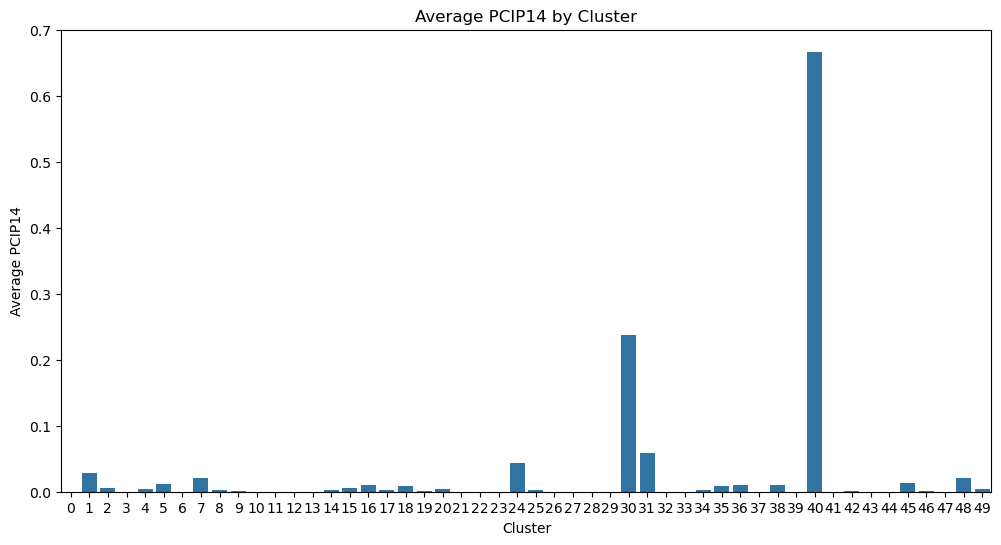

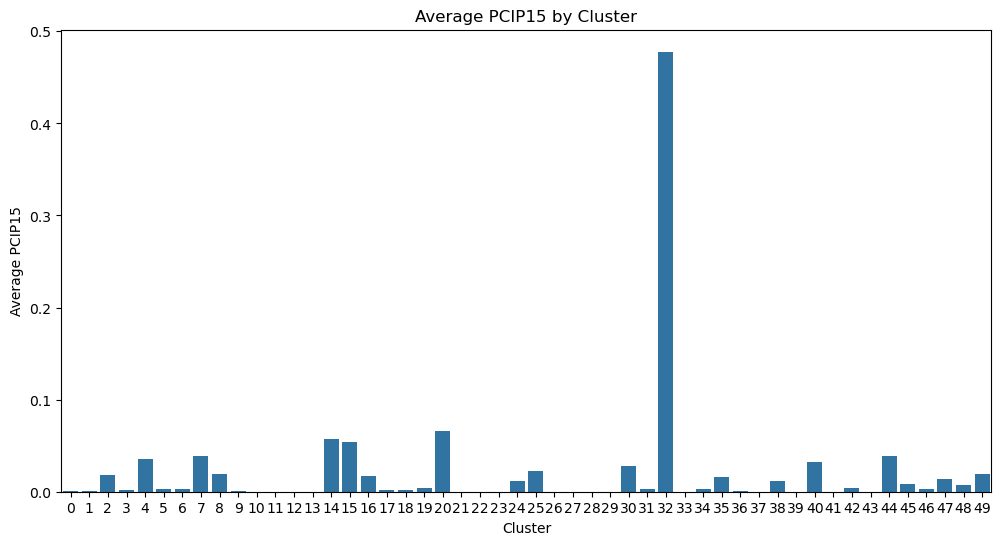

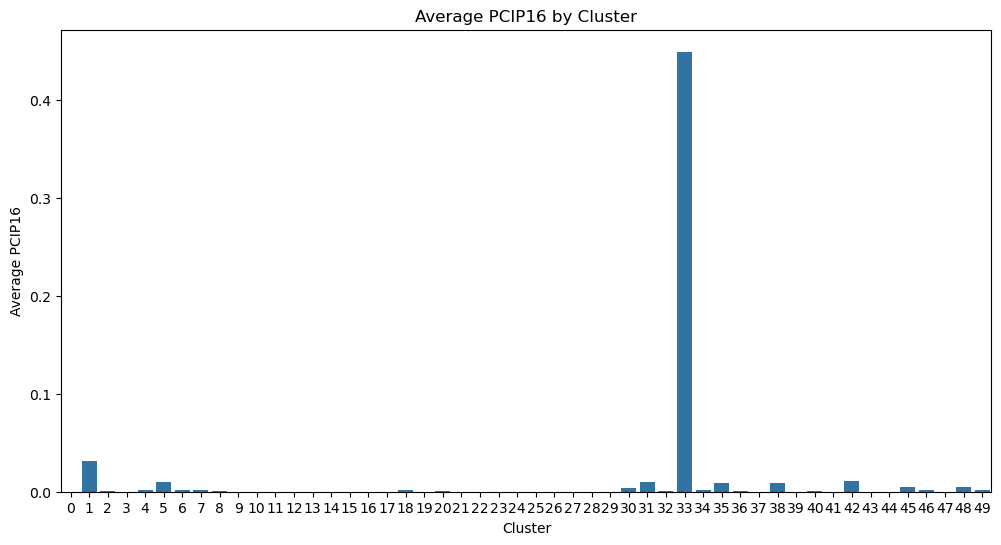

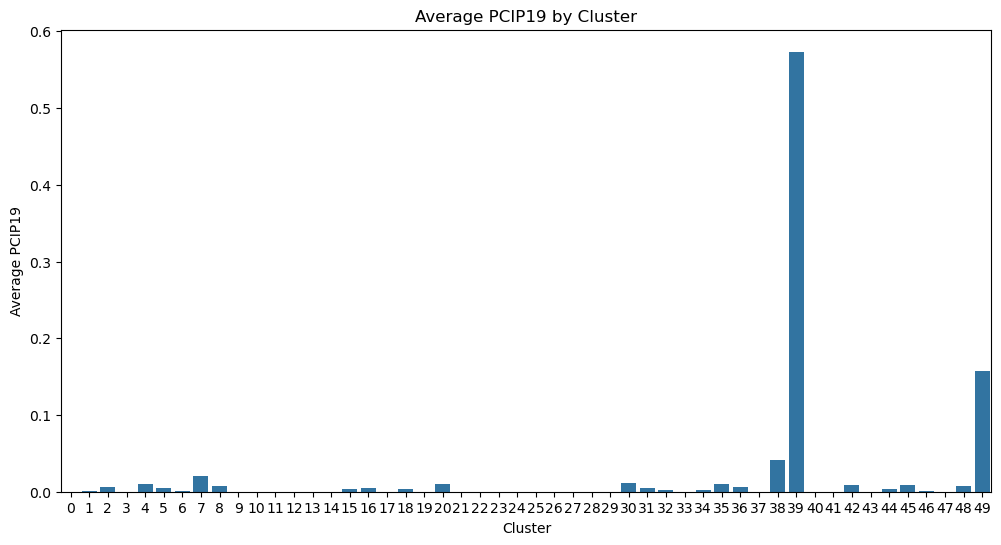

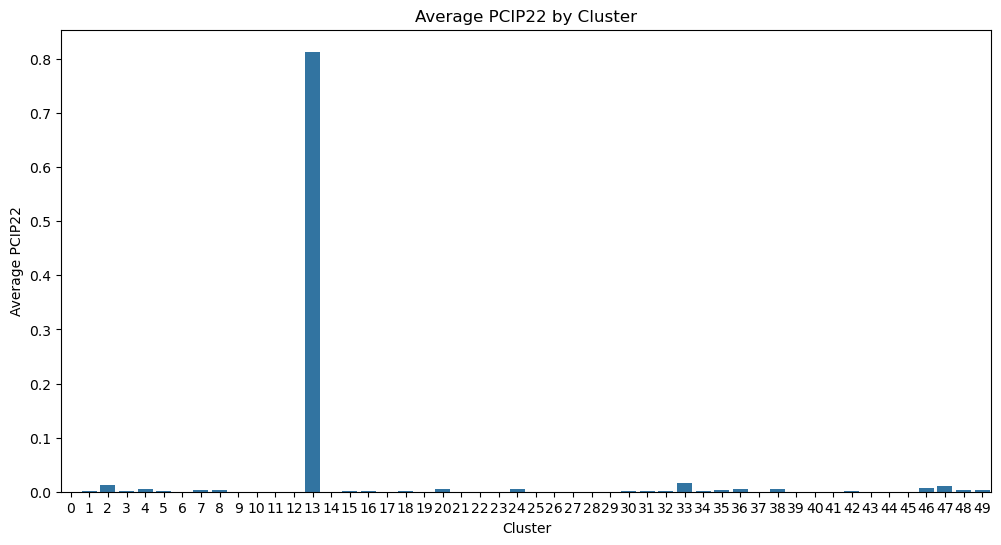

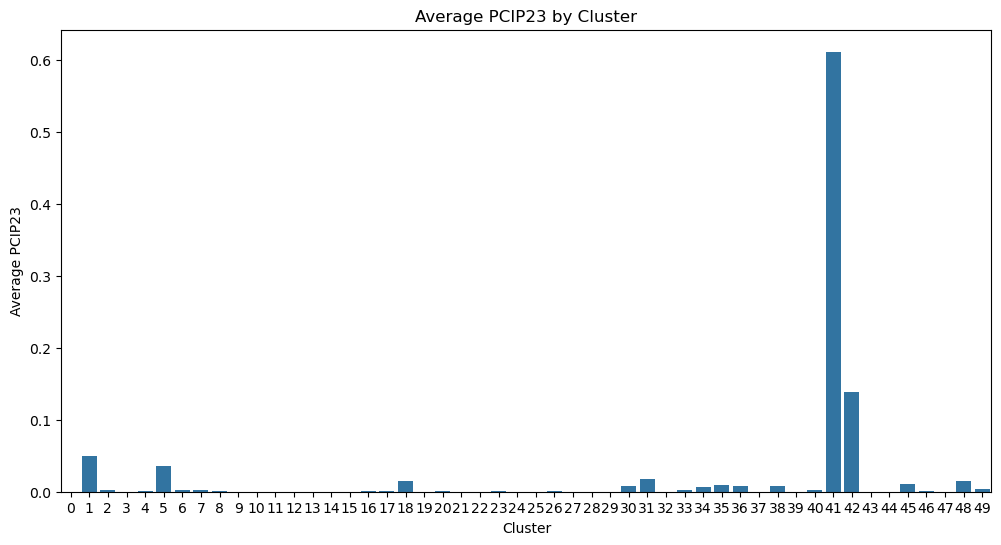

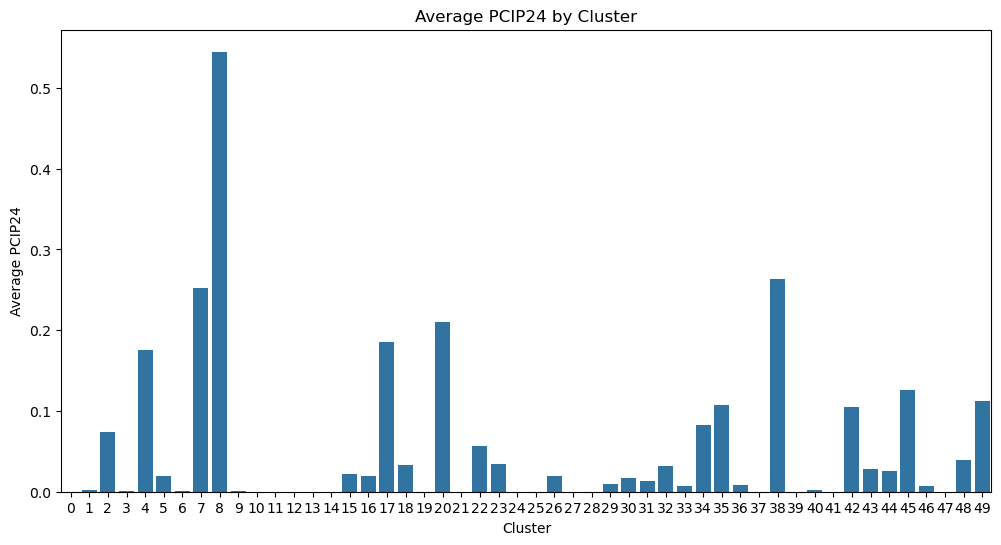

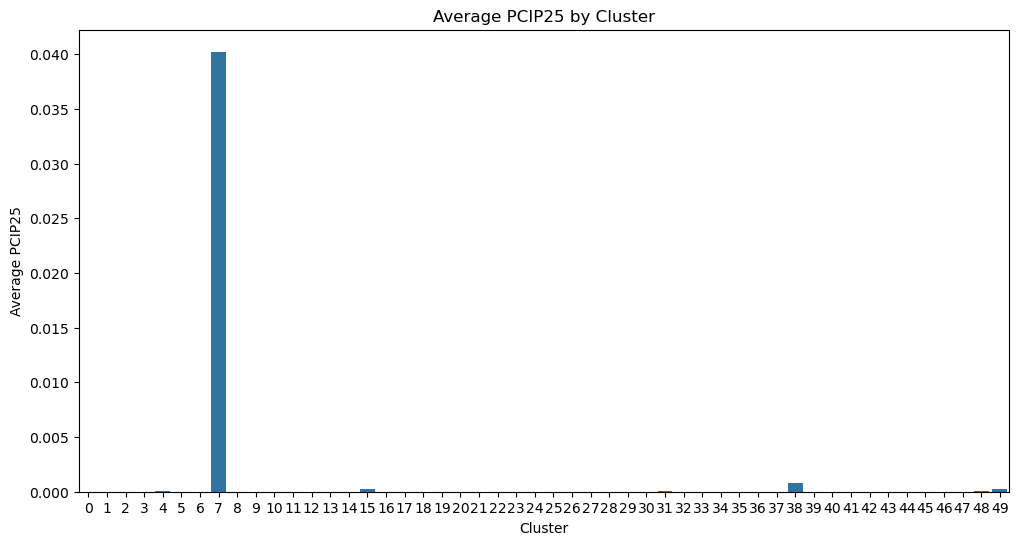

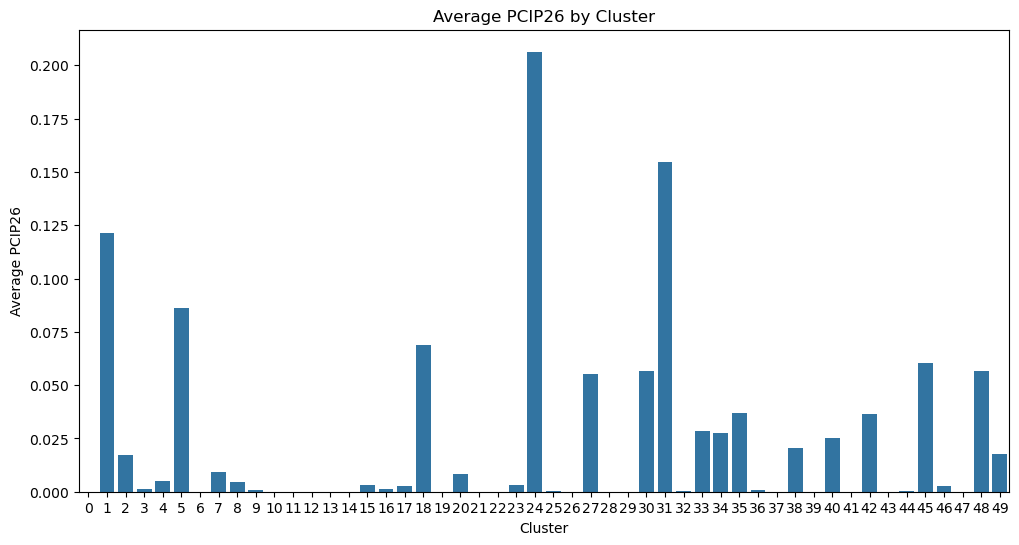

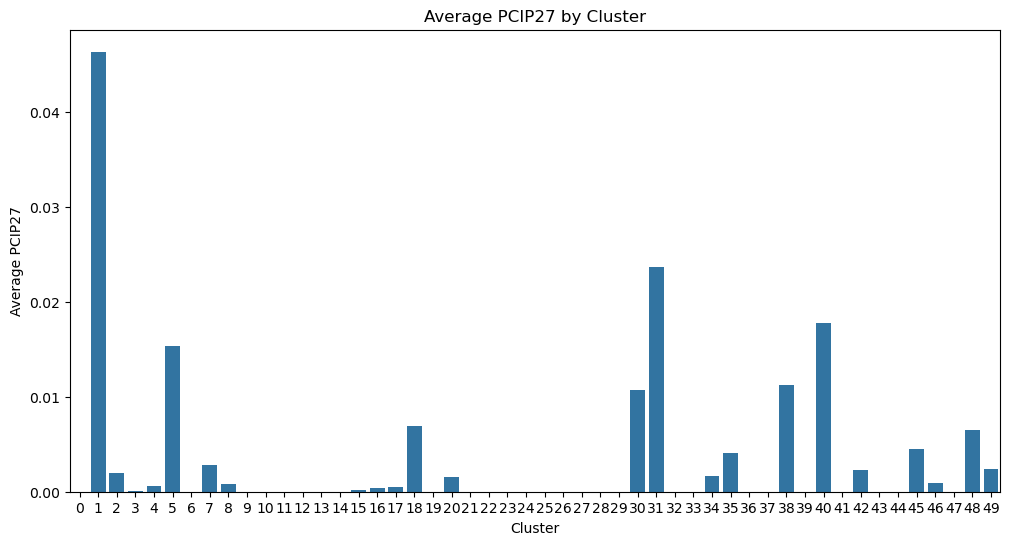

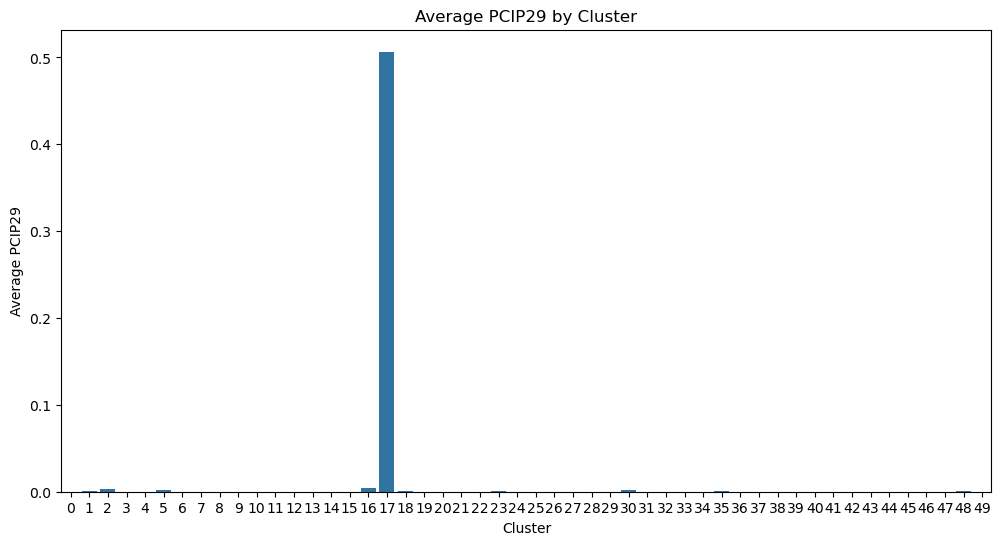

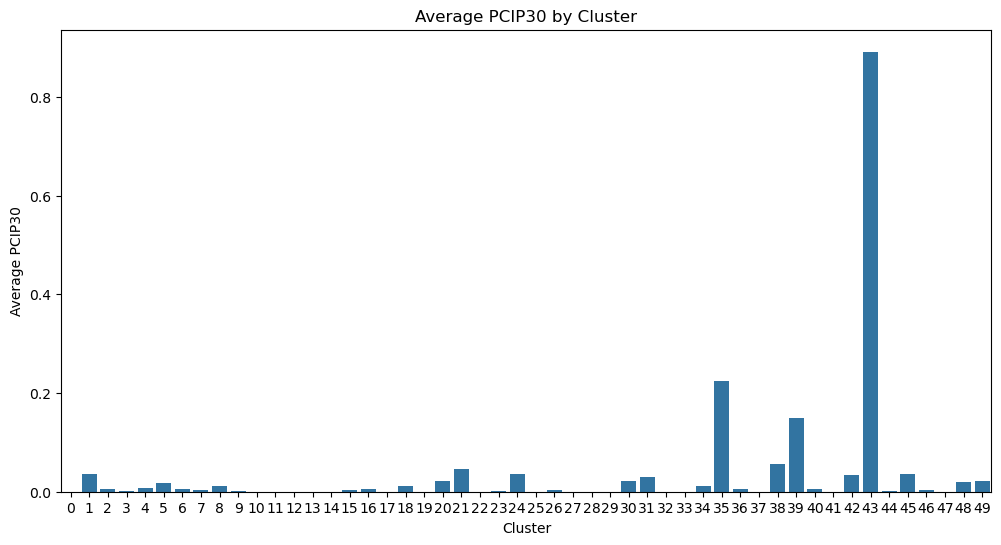

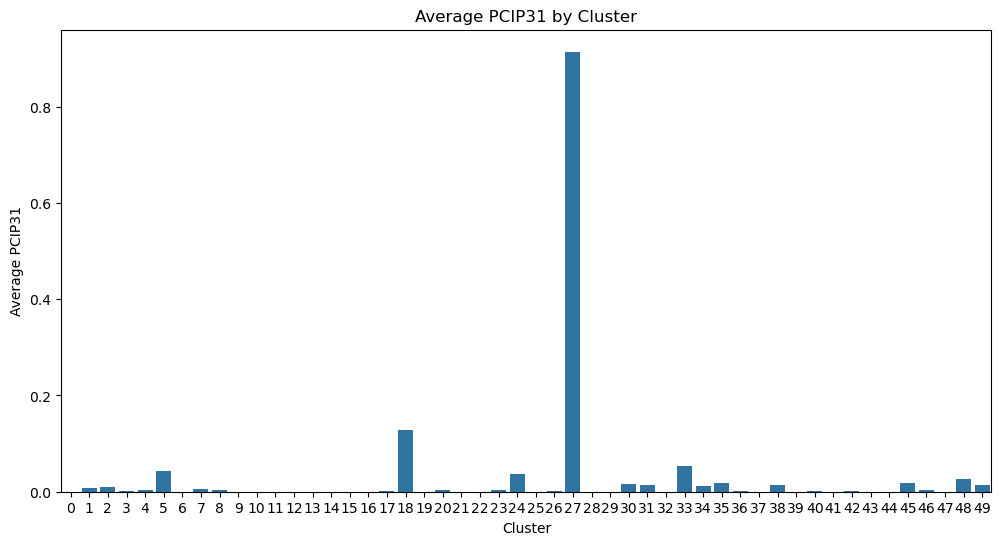

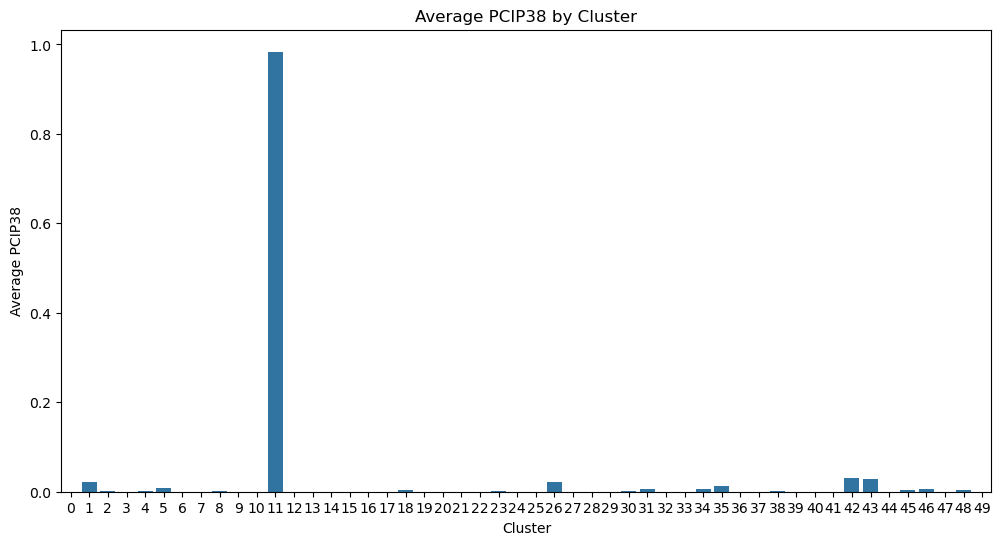

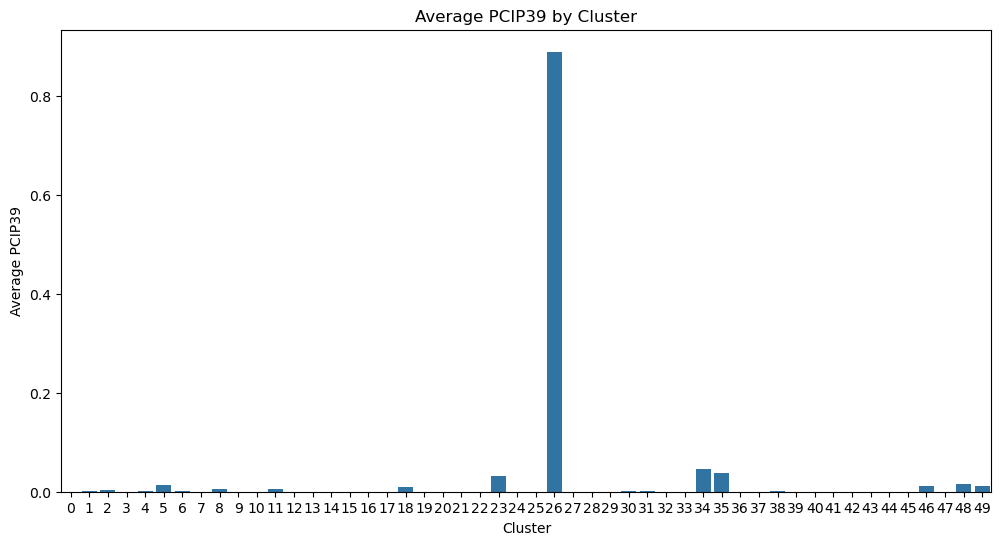

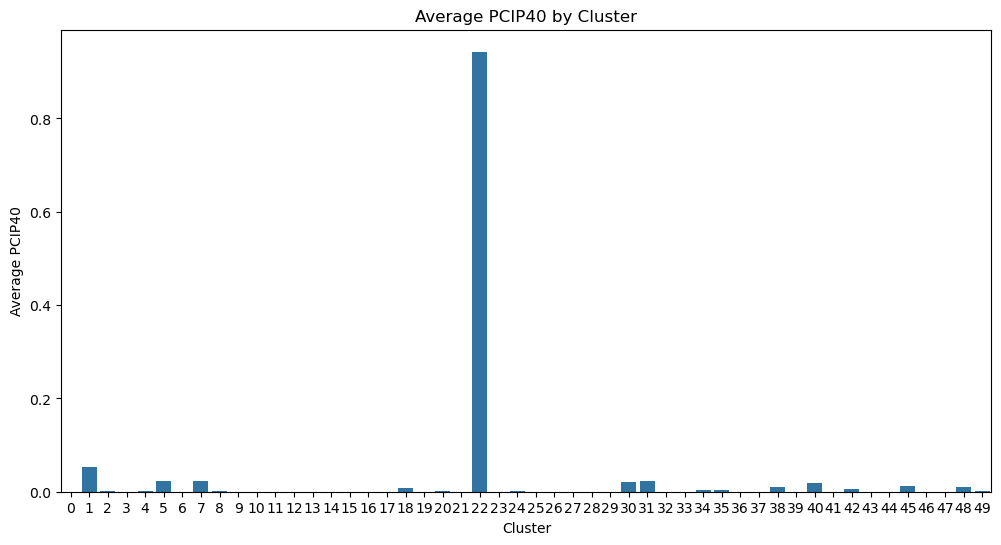

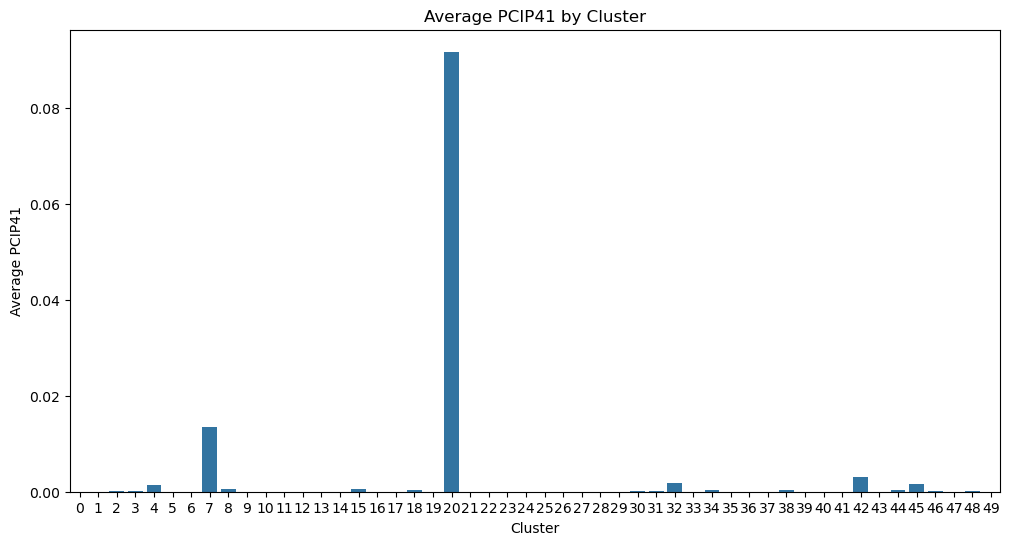

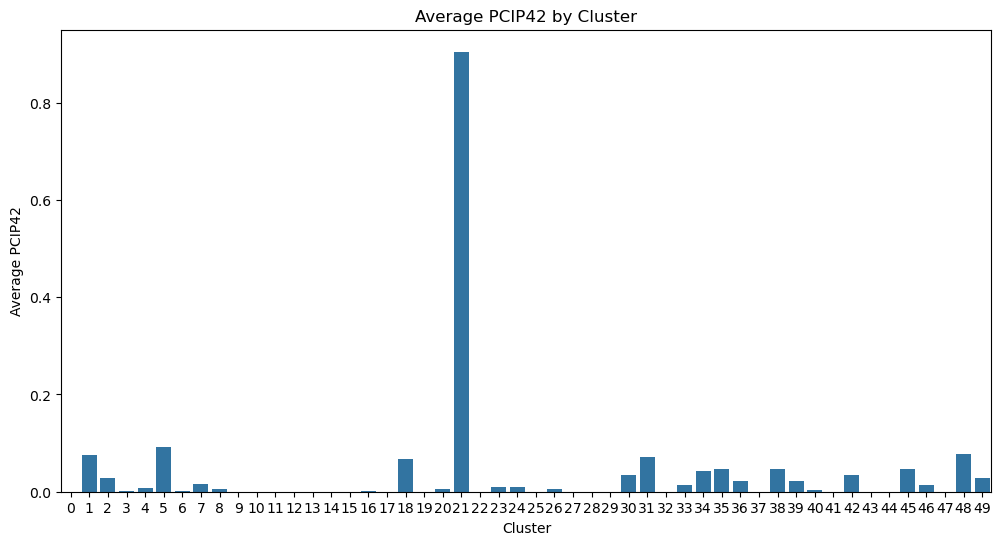

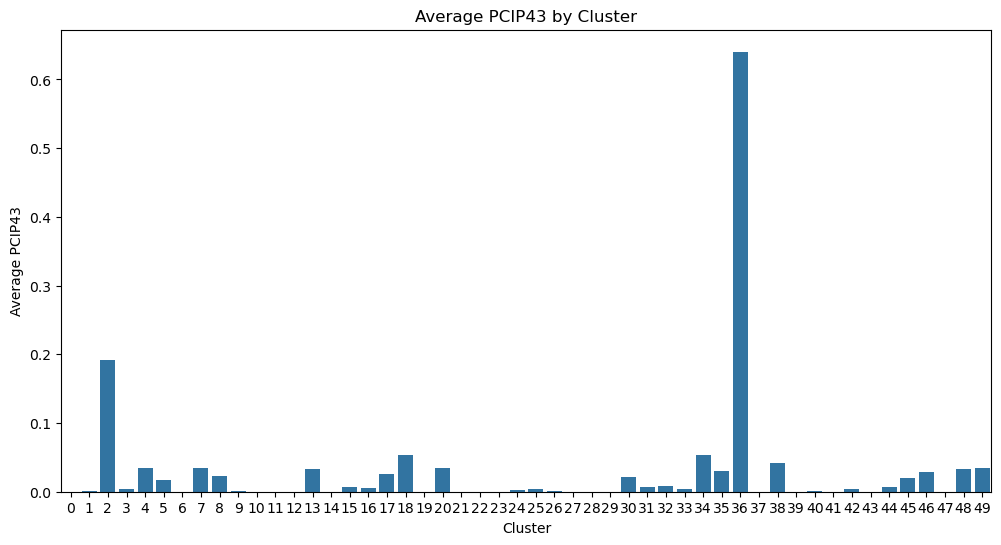

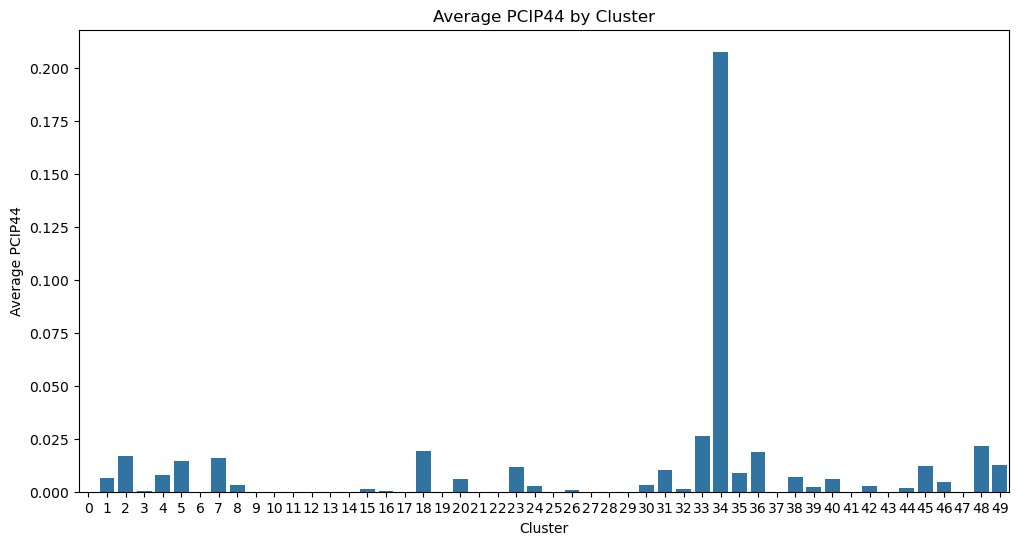

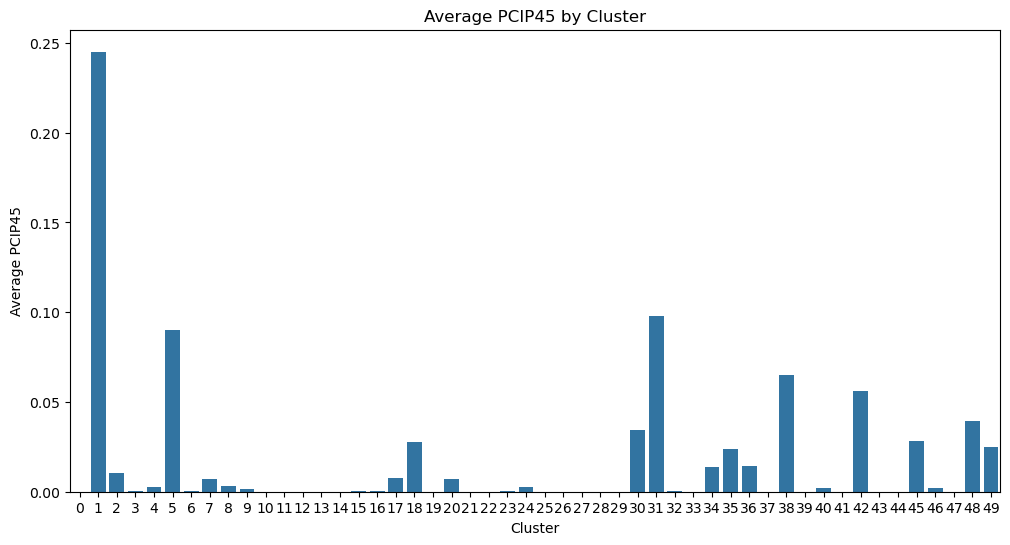

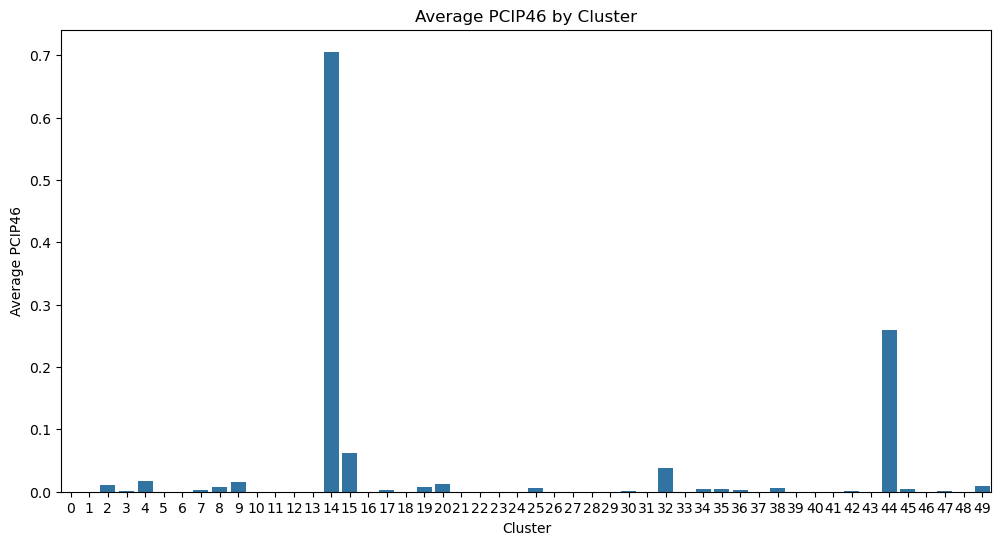

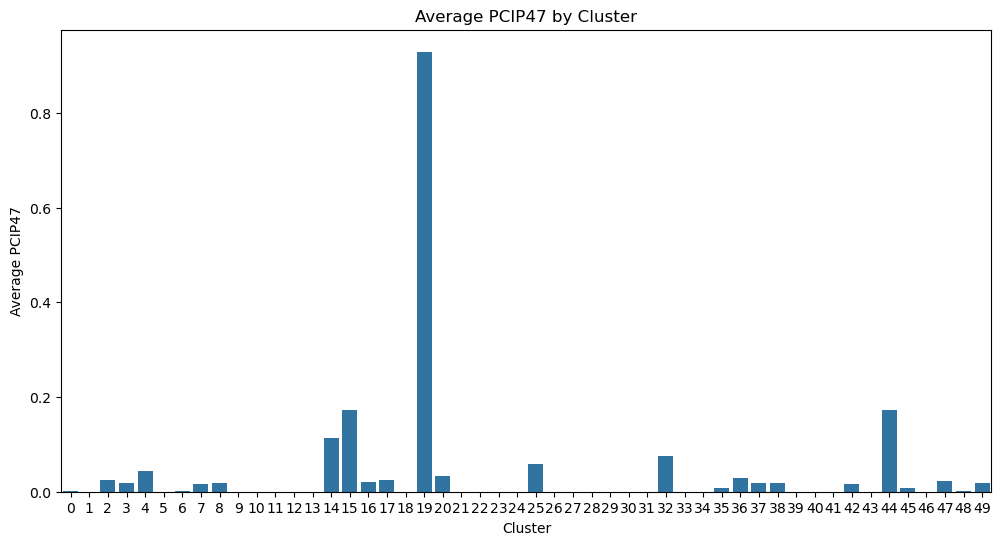

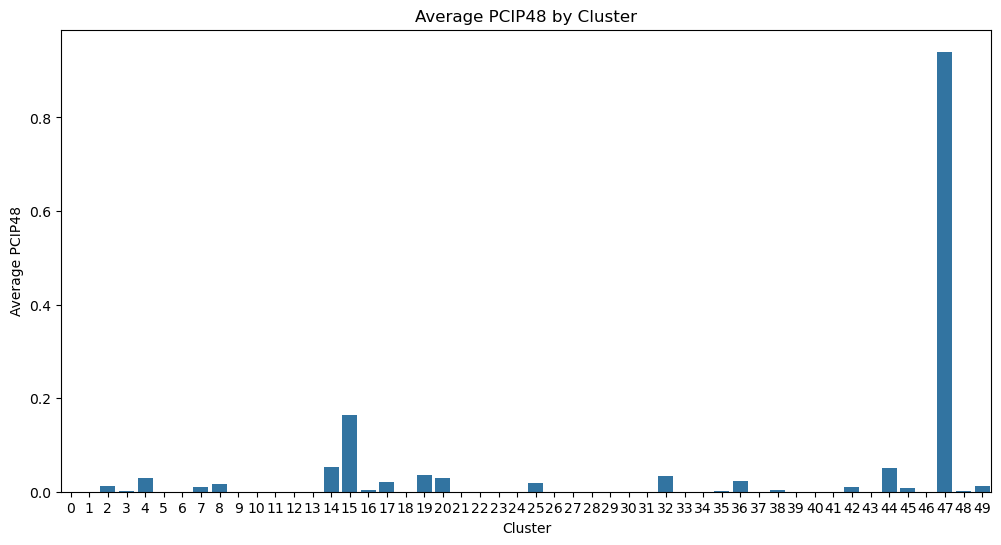

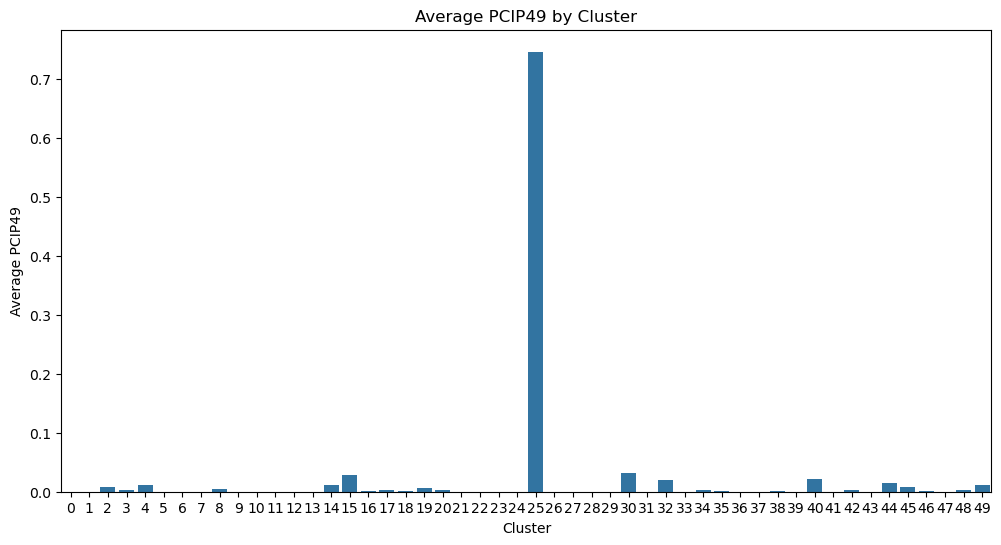

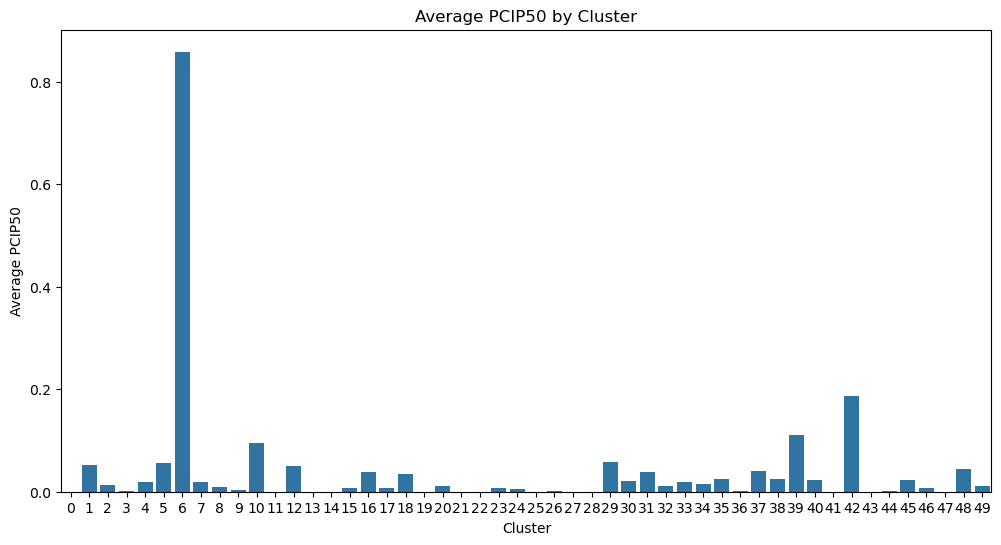

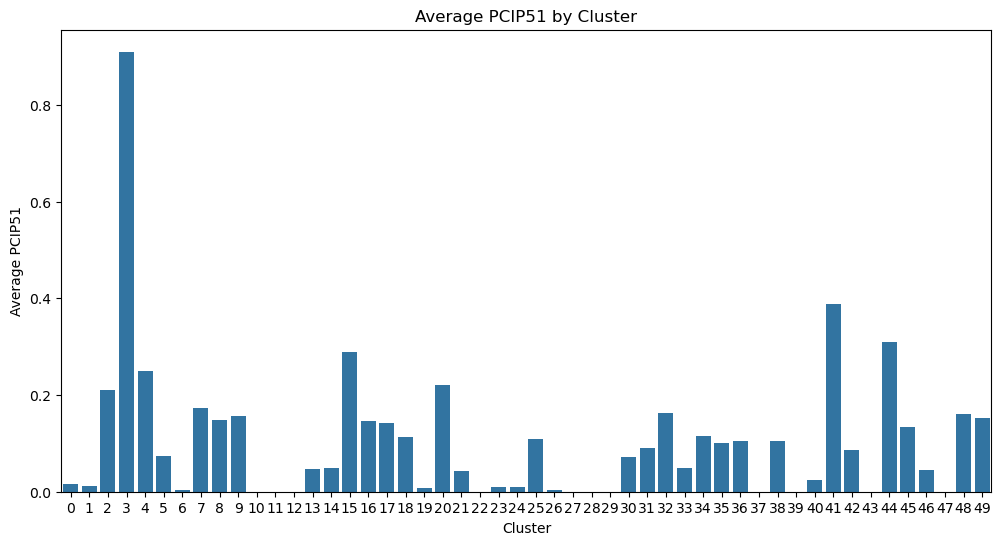

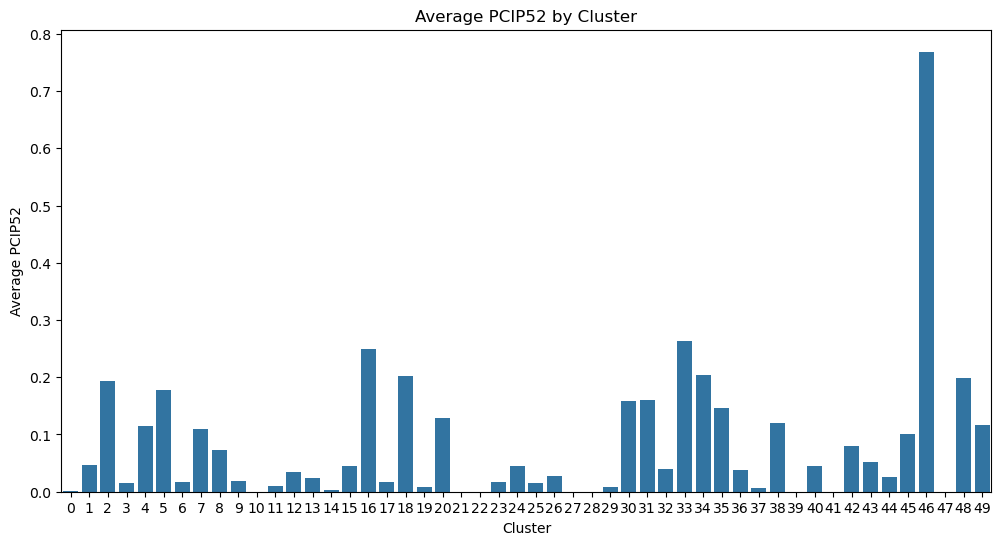

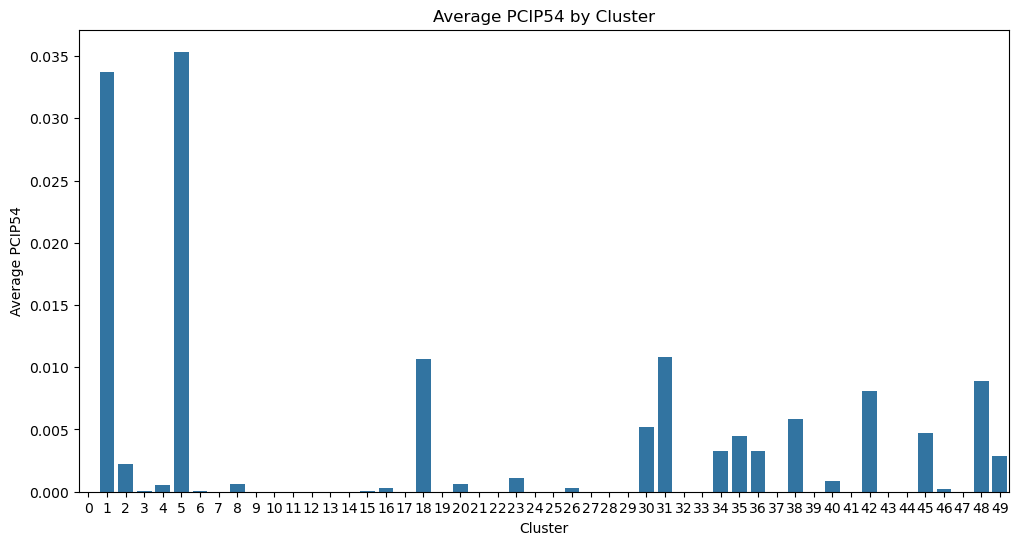

In [17]:
for column in pcip_columns:
    plot_pcip_cluster_means(cluster_means, column)

Interpretation: Some fields of study are put into different clusters probably due to the large amount of institutions that offer those fields as certificates or degrees.

In [18]:
# function to obtain colleges by cluster
def get_colleges_by_pcip(pcip_column, data):
    if pcip_column not in data.columns:
        return pd.DataFrame()
    cluster_label = data.groupby('Cluster')[pcip_column].mean().idxmax()
    colleges_in_cluster = data[data['Cluster'] == cluster_label]
    return colleges_in_cluster[['INSTNM', 'CITY', 'STABBR', 'INSTURL', pcip_column]]
pcip_column = "PCIP01"
colleges_in_cluster = get_colleges_by_pcip(pcip_column, data)
print(colleges_in_cluster)

                                                 INSTNM              CITY  \
450              Bel-Rea Institute of Animal Technology            Denver   
625                   Merryfield School of Pet Grooming      Oakland Park   
824                                         Fox College       Tinley Park   
958         International Business College-Indianapolis      Indianapolis   
1739          Nebraska College of Technical Agriculture            Curtis   
2393  Ohio State University Agricultural Technical I...           Wooster   
2645                                 Vet Tech Institute        Pittsburgh   
2963                      Vet Tech Institute of Houston           Houston   
3450                   University of Puerto Rico-Utuado            Utuado   
3532                          Platt College-Los Angeles          Alhambra   
3758  School of Professional Horticulture New York B...             Bronx   
3796                           City College-Gainesville       Gainesville   

In [19]:
# function to obtain colleges sorted from greatest to least values in "PCIP" columns
def display_sorted_colleges_by_pcip(pcip_column, data):
    if pcip_column not in data.columns:
        return pd.DataFrame()
    sorted_colleges = data[['INSTNM', pcip_column]].sort_values(by=pcip_column, ascending=False)
    return sorted_colleges
pcip_column = "PCIP01"
sorted_colleges_by_pcip = display_sorted_colleges_by_pcip(pcip_column, data)
print(sorted_colleges_by_pcip)

                                                 INSTNM  PCIP01
5412                    Pets Playground Grooming School     1.0
4794                Bergin University of Canine Studies     1.0
2645                                 Vet Tech Institute     1.0
3758  School of Professional Horticulture New York B...     1.0
5259                       Kentucky Horseshoeing School     1.0
...                                                 ...     ...
2429              Franciscan University of Steubenville     0.0
2427                                Stark State College     0.0
2426            Hussian College-Daymar College Columbus     0.0
2424                           Shawnee State University     0.0
2855                         University of South Dakota     0.0

[5711 rows x 2 columns]


## DBSCAN Clustering

In [20]:
# apply DBSCAN clustering similarly to KMeans
pcip_columns = [col for col in data.columns if col.startswith('PCIP')]
pcip_data = data[pcip_columns]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pcip_data)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
data['DBSCAN_Cluster'] = dbscan_labels
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

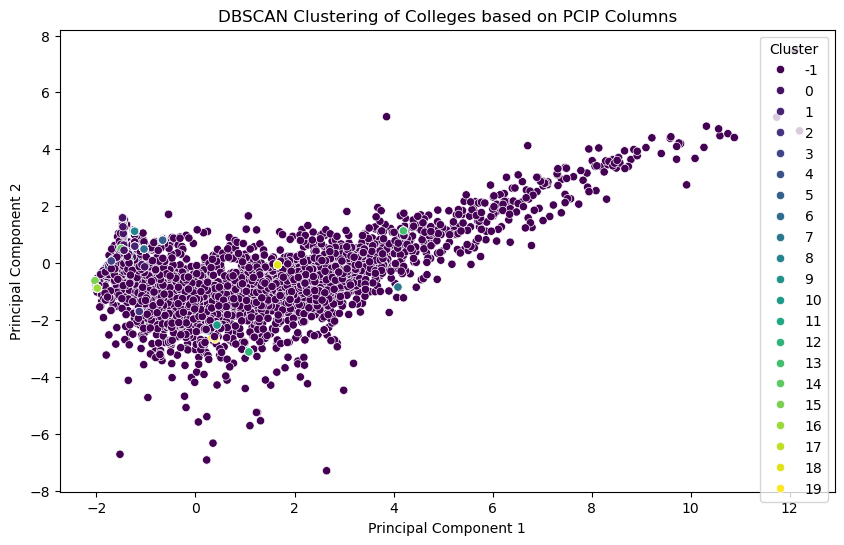

In [21]:
# plot DBSCAN clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=data, palette='viridis', legend='full')
plt.title('DBSCAN Clustering of Colleges based on PCIP Columns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster');

In [22]:
# calculate DBSCAN silhouette score (ignoring noise points with label -1)
labels = dbscan_labels[dbscan_labels != -1]
silhouette_score(scaled_features[dbscan_labels != -1], labels)

0.4057589009879435

In [23]:
# function to obtain colleges by DBSCAN cluster
def get_colleges_in_dbscan_cluster(data, pcip_column):
    if pcip_column not in pcip_columns:
        return f"Column {pcip_column} not found in PCIP columns"
    cluster_means = data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[pcip_column].mean()
    target_cluster = cluster_means.idxmax()
    colleges_in_cluster = data[data['DBSCAN_Cluster'] == target_cluster]
    return colleges_in_cluster[['INSTNM', pcip_column, 'DBSCAN_Cluster']]
pcip_column = 'PCIP01'
colleges_in_cluster = get_colleges_in_dbscan_cluster(data, pcip_column)
print(colleges_in_cluster)

                                                 INSTNM  PCIP01  \
450              Bel-Rea Institute of Animal Technology     1.0   
625                   Merryfield School of Pet Grooming     1.0   
1739          Nebraska College of Technical Agriculture     1.0   
2645                                 Vet Tech Institute     1.0   
2963                      Vet Tech Institute of Houston     1.0   
3758  School of Professional Horticulture New York B...     1.0   
4794                Bergin University of Canine Studies     1.0   
4818          Colorado Academy of Veterinary Technology     1.0   
4835                         Carrington College-Ontario     1.0   
5259                       Kentucky Horseshoeing School     1.0   
5330                      Pima Medical Institute-Dillon     1.0   
5412                    Pets Playground Grooming School     1.0   
5555              Apex College of Veterinary Technology     1.0   

      DBSCAN_Cluster  
450               11  
625            

In [24]:
# calculate silhouette scores for different samples
min_samples_range = range(2, 11)
silhouette_scores = []
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(scaled_features)
    labels = cluster_labels[cluster_labels != -1]
    silhouette_avg = silhouette_score(scaled_features[cluster_labels != -1], labels) if np.any(labels) else -1
    silhouette_scores.append(silhouette_avg)

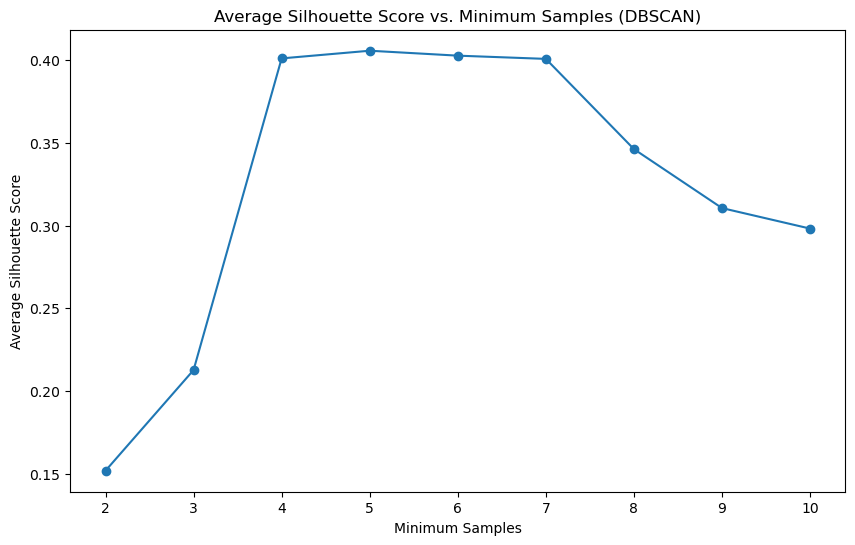

In [25]:
# plot DBSCAN silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(min_samples_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Average Silhouette Score vs. Minimum Samples (DBSCAN)')
plt.xlabel('Minimum Samples')
plt.ylabel('Average Silhouette Score');